# Insurance Recommender Engine

Get user health data with smart watch APIs, then analyse & predict their health condition. Based on prediction, we can recommend a best fit insurance.


Dataset is a sample of 46 participants (26 women) to wear three devices, a GENEActiv, and Apple Watch Series 2, a Fitbit Charge HR2. Participants completed a 65-minute protocol with 40-minutes of total treadmill time and 25-minutes of sitting or lying time.
Dataset: https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data


## Setup


In [1536]:
import sys
sys.path.append('..')


In [1537]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [1538]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report


## 1. Data Analysis


In [1539]:
# display first 10 rows
df = pd.read_csv('../datasets/people/aw_fb_data.csv')

df.head(5)


,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [1540]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [1541]:
df.describe()


,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,1771.144317,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239
std,1808.405375,1097.988748,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690
25%,1566.750000,789.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260
50%,3132.500000,1720.000000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619
75%,4698.250000,2759.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562
max,6264.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000


In [1542]:
# display shape of the dataset
df.shape


(6264, 20)

The dataset contains 6264 rows and 20 columns.


In [1543]:
# unique value of "activity" column
df['activity'].unique()


array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

According to result above, there are 7 differet activities.


In [1544]:
# count total number of each activity
df.activity.value_counts()


Lying             1379
Running 7 METs    1114
Running 5 METs    1002
Running 3 METs     950
Sitting            930
Self Pace walk     889
Name: activity, dtype: int64

In [1545]:
# display type of data
df.dtypes.value_counts()


float64    14
int64       4
object      2
dtype: int64

### Plot object type data


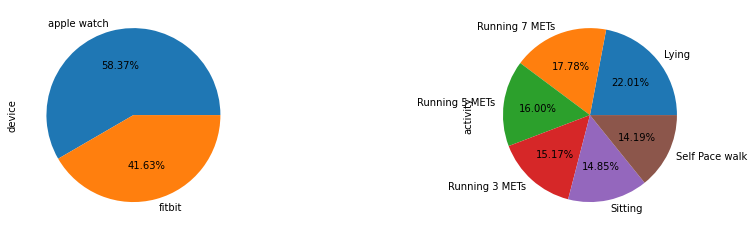

In [1546]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['device'].value_counts().plot.pie(autopct='%.2f%%', ax=ax1)
df['activity'].value_counts().plot.pie(autopct='%.2f%%', ax=ax2)
plt.show()


### Plot activities of each device on heatmap


<AxesSubplot:xlabel='device', ylabel='activity'>

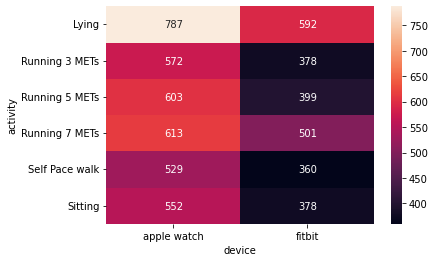

In [1547]:
sns.heatmap(pd.crosstab(df["activity"], df["device"]), annot=True, fmt='d')


## 2. Data Preprocessing


Prepare useful columns that will be used for building model


In [1548]:
df = df[["hear_rate", "steps", "distance", "calories",
         "resting_heart", "age", "gender", "height", "weight", "device", "activity"]]


In [1549]:
# display null value
df.isna().sum()


hear_rate        0
steps            0
distance         0
calories         0
resting_heart    0
age              0
gender           0
height           0
weight           0
device           0
activity         0
dtype: int64

Plot columns on heatmap to see correlation


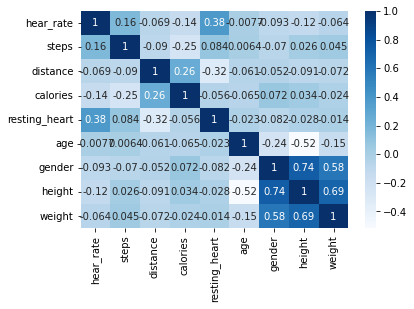

In [1550]:
ax = plt.subplots()
ax = sns.heatmap(df.corr(), annot=True, cmap="Blues")


<AxesSubplot:>

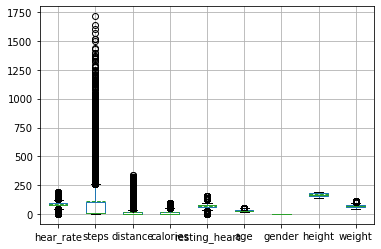

In [1551]:
df.boxplot(meanline=True, showmeans=True)


According to the boxplot above, we are able to know that the dataset contains outlier.


In [1552]:
# remove outlier using interquartile range (IQR)
def outlier(col):
    Q3, Q1 = np.nanpercentile(col, [75, 25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL, LL


In [1553]:
for column in df.columns:
    if df[column].dtype != 'object':
        UL, LL = outlier(df[column])
        df[column] = np.where((df[column] > UL) | (
            df[column] < LL), np.nan, df[column])


In [1554]:
# display null value
df.isna().sum()


hear_rate        1050
steps             814
distance          278
calories         1149
resting_heart     634
age               390
gender              0
height              0
weight            158
device              0
activity            0
dtype: int64

In [1555]:
# drop outlier
df.dropna()


,hear_rate,steps,distance,calories,resting_heart,age,gender,height,weight,device,activity
0,78.531302,10.771429,0.008327,0.344533,59.000000,20.0,1.0,168.0,65.4,apple watch,Lying
1,78.453390,11.475325,0.008896,3.287625,59.000000,20.0,1.0,168.0,65.4,apple watch,Lying
2,78.540825,12.179221,0.009466,9.484000,59.000000,20.0,1.0,168.0,65.4,apple watch,Lying
3,78.628260,12.883117,0.010035,10.154556,59.000000,20.0,1.0,168.0,65.4,apple watch,Lying
4,78.715695,13.587013,0.010605,10.825111,59.000000,20.0,1.0,168.0,65.4,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...
6189,75.708658,1.750000,15.782895,25.500000,75.686542,36.0,0.0,172.0,86.4,fitbit,Running 7 METs
6190,75.686542,1.631579,15.784211,25.500000,75.686542,36.0,0.0,172.0,86.4,fitbit,Running 7 METs
6191,75.664427,1.513158,15.785526,30.000000,75.686542,36.0,0.0,172.0,86.4,fitbit,Running 7 METs
6192,75.642311,1.394737,15.786842,31.000000,75.686542,36.0,0.0,172.0,86.4,fitbit,Running 7 METs


In [1556]:
# drop null value of X
df = df.dropna(axis=0)


In [1557]:
# Split dataset based on device type (Apple and Fitbit)
df_apple = df.loc[df["device"] == "apple watch"]
df_fitbit = df.loc[df["device"] == "fitbit"]

# Remove "device" column
df_apple = df_apple.drop("device", axis=1)
df_fitbit = df_fitbit.drop("device", axis=1)


## 3. Training


### 3.1. Split Apple & Fitbit data


In [1558]:
# Prepare data for training (Apple)
X = df_apple.drop("activity", axis=1)
y = df_apple.loc[:, "activity"]


In [1559]:
# Prepare data for training (Fitbit)
X = df_fitbit.drop("activity", axis=1)
y = df_fitbit.loc[:, "activity"]


### 3.2. Feature encoding


In [1560]:
# Display unique value of activity (Apple)
df_apple['activity'].unique()


array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [1561]:
# Display unique value of activity (Fitbit)
df_fitbit['activity'].unique()


array(['Lying', 'Sitting', 'Self Pace walk', 'Running 3 METs',
       'Running 5 METs', 'Running 7 METs'], dtype=object)

In [365]:
# Feature encoding
mapping = {'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2,
           'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


def one_hot_encoding(df):
    ordinal_encoder = ce.OrdinalEncoder(
        cols=['activity'],
        mapping=[{
            'col': 'activity',
            'mapping': mapping
        }]
    )

    df_ = ordinal_encoder.fit_transform(df)
    return df_


In [366]:
def preprocessing(df):
    df = one_hot_encoding(df)
    X = df.drop("activity", axis=1)
    y = df.loc[:, "activity"]
    return X, y


### 3.3. Prepare Dataset

Split 20% of data for testing


In [367]:
Apple_trainset, Apple_testset = train_test_split(
    df_apple, test_size=0.2, random_state=0)
fitbit_trainset, fitbit_testset = train_test_split(
    df_fitbit, test_size=0.2, random_state=0)


In [368]:
XApple_train, yApple_train = preprocessing(Apple_trainset)
Xfitbit_train, yfitbit_train = preprocessing(fitbit_trainset)


In [369]:
Xfitbit_test, yfitbit_test = preprocessing(fitbit_testset)
XApple_test, yApple_test = preprocessing(Apple_testset)


### 3.4. Standardization


In [370]:
def standardisation(df):
    scaler = StandardScaler()
    X = scaler.fit_transform(df)
    return X


In [371]:
XApple_train = standardisation(XApple_train)
Xfitbit_test = standardisation(Xfitbit_test)
XApple_test = standardisation(XApple_test)
Xfitbit_train = standardisation(Xfitbit_train)


## 4. Evaluation


In [422]:
def evaluate_model(model, Xtrain, Ytrain, Xtest, Ytest):
    model.fit(Xtrain, Ytrain)
    ypred = model.predict(Xtest)
    print(classification_report(Ytest, ypred))
    print("Training accuracy {}".format(model.score(Xtrain, Ytrain)))
    print("Testing accuracy {}".format(model.score(Xtest, Ytest)))
    print("Mapping:\n{}".format(mapping))


### 4.1. Decision Tree Model


In [423]:
tree = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=13)


In [424]:
# Decision tree for Apple Watch
evaluate_model(tree, XApple_train, yApple_train, XApple_test, yApple_test)


              precision    recall  f1-score   support

           0       0.36      0.38      0.37        98
           1       0.52      0.41      0.46        75
           2       0.55      0.50      0.52        98
           3       0.51      0.50      0.50        70
           4       0.30      0.40      0.34        55
           5       0.51      0.53      0.52        49

    accuracy                           0.45       445
   macro avg       0.46      0.45      0.45       445
weighted avg       0.46      0.45      0.45       445

Training accuracy 0.9527293190770962
Testing accuracy 0.449438202247191
Mapping:
{'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2, 'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


In [425]:
# Decision tree for Fitbit
evaluate_model(tree, Xfitbit_train, yfitbit_train, Xfitbit_test, yfitbit_test)


              precision    recall  f1-score   support

           0       0.97      0.33      0.50        87
           1       0.33      0.17      0.22         6
           2       0.00      0.00      0.00         6
           3       0.10      0.89      0.17         9
           4       0.38      0.20      0.26        40
           5       0.72      1.00      0.84        26

    accuracy                           0.41       174
   macro avg       0.42      0.43      0.33       174
weighted avg       0.70      0.41      0.45       174

Training accuracy 1.0
Testing accuracy 0.41379310344827586
Mapping:
{'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2, 'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


### 4.2. Support-vector machine model


In [426]:
SVM = SVC()


In [427]:
# SVM for Apple Watch
evaluate_model(SVM, XApple_train, yApple_train, XApple_test, yApple_test)


              precision    recall  f1-score   support

           0       0.31      0.70      0.43        98
           1       0.48      0.33      0.39        75
           2       0.57      0.38      0.45        98
           3       0.55      0.47      0.51        70
           4       0.38      0.11      0.17        55
           5       0.61      0.35      0.44        49

    accuracy                           0.42       445
   macro avg       0.48      0.39      0.40       445
weighted avg       0.47      0.42      0.41       445

Training accuracy 0.46933033202025887
Testing accuracy 0.4202247191011236
Mapping:
{'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2, 'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


In [428]:
# SVM for Fitbit
evaluate_model(SVM, Xfitbit_train, yfitbit_train, Xfitbit_test, yfitbit_test)


              precision    recall  f1-score   support

           0       0.62      0.84      0.72        87
           1       0.33      0.33      0.33         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         9
           4       0.38      0.12      0.19        40
           5       0.68      1.00      0.81        26

    accuracy                           0.61       174
   macro avg       0.34      0.38      0.34       174
weighted avg       0.51      0.61      0.53       174

Training accuracy 0.6060606060606061
Testing accuracy 0.6091954022988506
Mapping:
{'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2, 'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


### 4.3. K-nearest Neighbors Classifier Model


In [429]:
KNN = KNeighborsClassifier()


In [430]:
# KNN for Apple Watch
evaluate_model(KNN, XApple_train, yApple_train, XApple_test, yApple_test)


              precision    recall  f1-score   support

           0       0.65      0.62      0.64        98
           1       0.66      0.89      0.76        75
           2       0.78      0.74      0.76        98
           3       0.71      0.71      0.71        70
           4       0.58      0.55      0.56        55
           5       0.74      0.51      0.60        49

    accuracy                           0.69       445
   macro avg       0.69      0.67      0.67       445
weighted avg       0.69      0.69      0.68       445

Training accuracy 0.8064153066966798
Testing accuracy 0.6876404494382022
Mapping:
{'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2, 'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


In [431]:
# KNN for Fitbit
evaluate_model(KNN, Xfitbit_train, yfitbit_train, Xfitbit_test, yfitbit_test)


              precision    recall  f1-score   support

           0       0.74      0.71      0.73        87
           1       0.17      0.17      0.17         6
           2       0.33      0.50      0.40         6
           3       0.55      0.67      0.60         9
           4       0.61      0.50      0.55        40
           5       0.77      0.92      0.84        26

    accuracy                           0.67       174
   macro avg       0.53      0.58      0.55       174
weighted avg       0.67      0.67      0.66       174

Training accuracy 0.823953823953824
Testing accuracy 0.6666666666666666
Mapping:
{'Lying': 0, 'Self Pace walk': 1, 'Running 3 METs': 2, 'Running 5 METs': 3, 'Sitting': 4, 'Running 7 METs': 5}


## 5. Conclusion


According to the 3 trained models above, KNN seems to perform better that Decision tree and Support-vector machine for both Apple and Fitbit. Thus, KNN will be used for our application.


Based on the data we receive from health tracker watch, we are able to predict the activity (behavior) of the user as we can see each activity's score (f1-score). Therefore, we can offer user a best fit insurance when we integrate to insurance API.


| Map | Label | F1-Score |
| - | - | - |
| 5 | Running 7 METs | 0.84 |
| 0 | Lying | 0.73 |
| 3 | Running 5 METs | 0.60 |
| 4 | Sitting | 0.55 |
| 2 | Running 3 METs | 0.40 |
| 1 | Self Pace walk | 0.17 |

For example, these data show that user like to do activity `Running 7 METs`, so FWD will consider whether the activity should be good for health or not.